# DySE Simple Example

This notebook demonstrates the DySE simulation capability using an extremely simple, contrived example.

In [9]:
import pandas as pd
from IPython.display import Image, display
from Simulation.Simulator_Python import simulator_interface
from Visualization import visualization_interface

In [23]:
model = [
    {'variable': 'hunger',
    'positive': 'drought,locusts', # drought and locusts increase hunger
    'negative': 'yield', # crop yields (+) decrease hunger
    'initial': 2}, # initial value of hunger is set to `2` (100%)
    
    {'variable': 'drought',
    'positive': '', # no variables increase drought
    'negative': 'rainfall', # rainfall decreases drought
    'initial': 0}, # initial value of drought is set to `0` (0%)
    
    {'variable': 'yield',
    'positive': 'rainfall', # rainfall increases crop yield
    'negative': 'drought,locusts', # drought and locusts decrease crop yield
    'initial': 1}, # initial value of crop yield is set to `1` (50%)
    
    {'variable': 'locusts',
    'positive': 'drought', # drought increases locusts
    'negative': 'rainfall', # rainfall decreases locusts
    'initial': 0}, # initial value of locusts is set to `0` (0%)
    
    {'variable': 'rainfall',
    'positive': '', # no variables increase rainfall
    'negative': '', # no variables decrease rainfall
    'initial': 1}, # initial value of rainfall is set to `1` (50%)    
]

In [24]:
model_df = pd.DataFrame.from_records(model)

Here we have to convert the `model_df` to an Excel file prior to running the simulation.

Note that the key simulation parameters are the number of time steps (`steps`) and the number of `runs` to perform.

In [25]:
export_path = 'example_model.xlsx'
simulation_trace_file = 'output.txt'
simulation_trace_path = ''
model_df.to_excel(export_path)
simulator_interface.setup_and_run_simulation(export_path, simulation_trace_file, steps=50, runs=100, outputFormat=1)

We have now generated the simulation output (trace) file, `output.txt`. We can examine it with:

In [26]:
simulation_output = open('output.txt','r').read()
simulation_output[:500]

'Run #0\ndrought|3| 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\nhunger|3| 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\nlocusts|3| 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\nrainfall|3| 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\nyield|3| 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 '

Finally, we can visualize one of the variables. We can choose `hunger`:

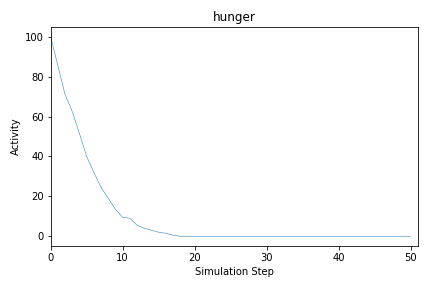

In [27]:
element = 'hunger'
visualization_interface.plot_as_picture([simulation_trace_file], simulation_trace_path, elementsList=[element])
Image(simulation_trace_path + element + '.png')